In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import os
import re

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
# Mount google drive to list the raw data files

# Mounting the drive is straightforward but requires authentication each 
# time we reset the session
drive.mount('/content/drive')
drive_path = '/content/drive/Shareddrives/Capstone_Vacancy/data/'
# ! ls /content/drive/Shareddrives/Capstone_Vacancy/data

# wifiData = pd.read_csv(drive_path + 'cleaned/' + 'wifi_ap_data.csv', index_col=0, header=[1,2,3], dtype='int32', parse_dates=True)
wifiData = pd.read_pickle(drive_path + 'cleaned/' + 'wifi_ap_data.pkl')

wifiData.tail()

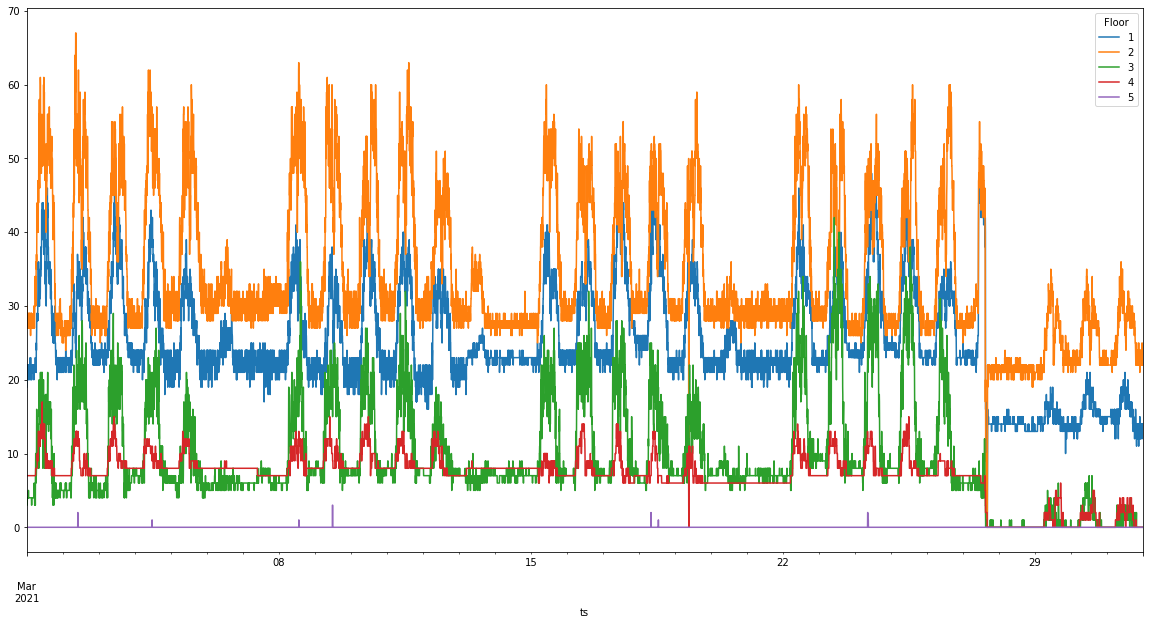

In [ ]:
wifiData["2021-03"].groupby('Floor', axis=1).sum().plot(stacked=False)

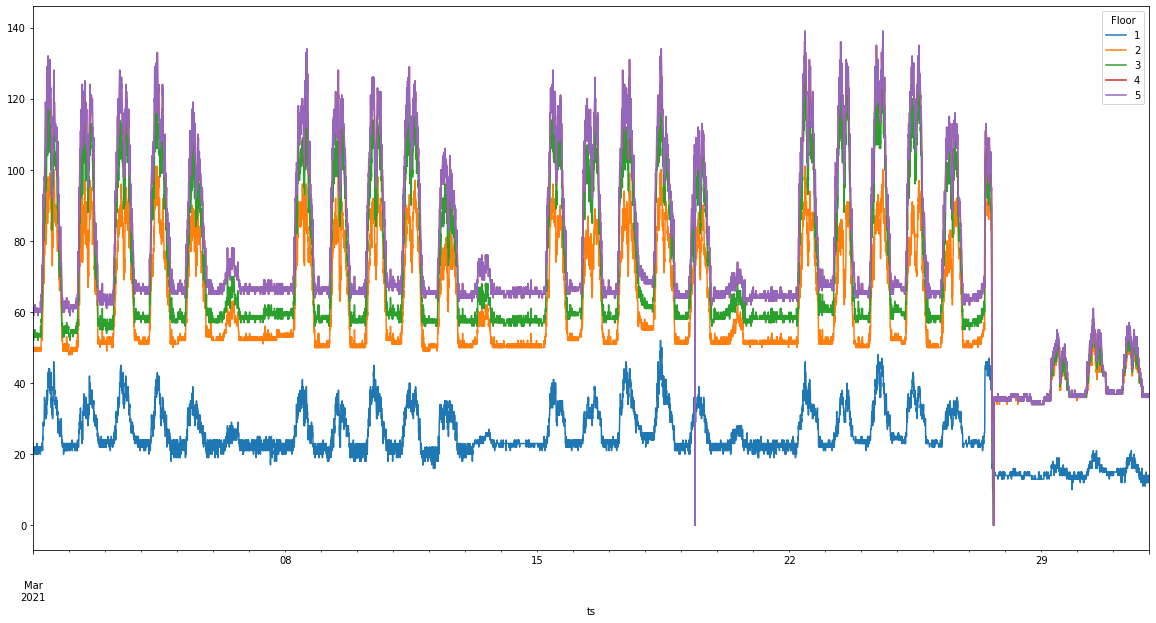

In [ ]:
wifiData["2021-03"].groupby('Floor', axis=1).sum().plot(stacked=True)

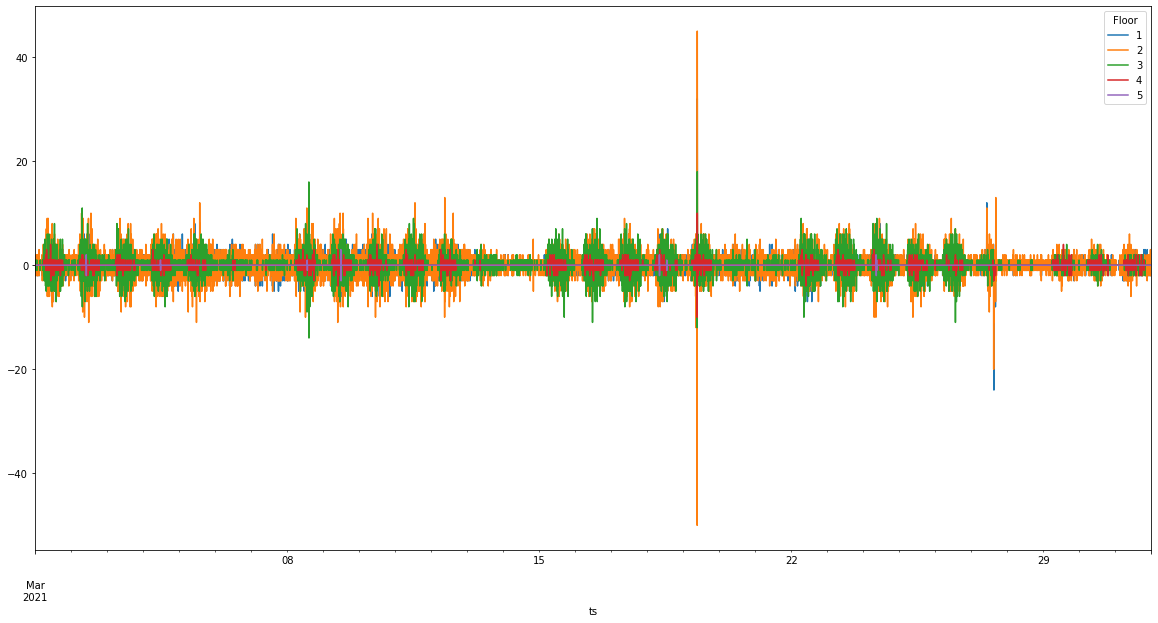

In [ ]:
wifiData["2021-03"].groupby('Floor', axis=1).sum().diff().plot()

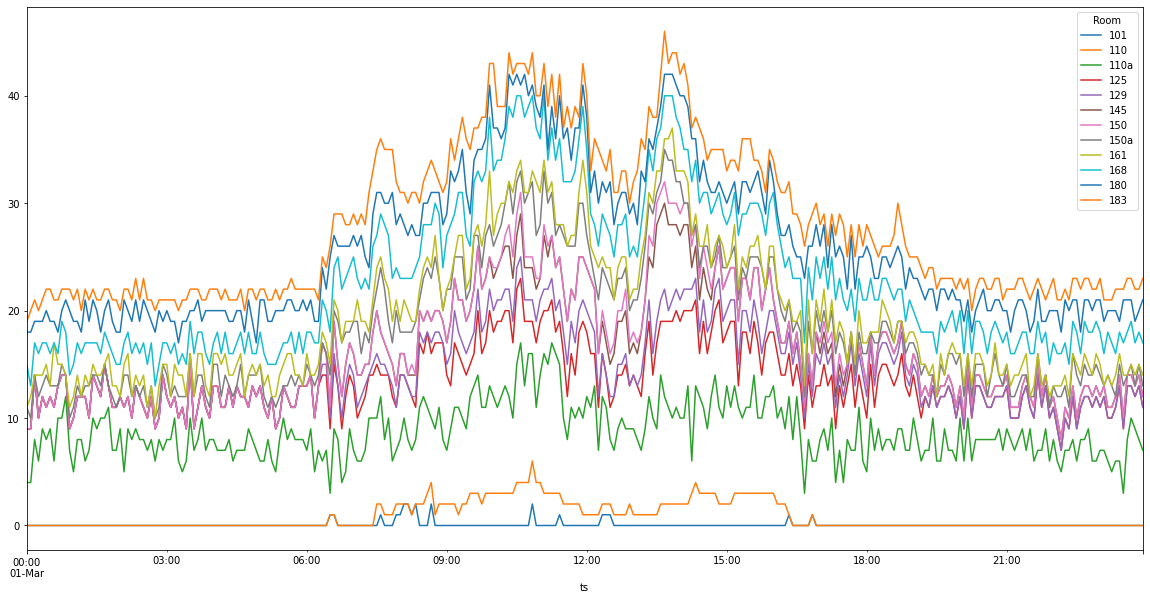

In [ ]:
wifiData.xs(level='Floor', key='1', axis=1)["2021-03-01"].groupby('Room', axis=1).sum().plot(stacked=True)

In [ ]:
wifiData.describe

<bound method NDFrame.describe of External                    True                           ... False              
Floor                           3                       2  ...     4             5
Room                          300     384     361     201  ...   460       481 581
AP                        300_Ext 384_Ext 361_Ext 201_Ext  ...  460n 460sw 481 581
ts                                                         ...                    
2020-04-30 17:00:00-07:00     NaN     NaN     1.0     NaN  ...   NaN   NaN NaN NaN
2020-04-30 17:05:00-07:00     NaN     1.0     1.0     NaN  ...   NaN   NaN NaN NaN
2020-04-30 17:10:00-07:00     NaN     1.0     1.0     NaN  ...   NaN   NaN NaN NaN
2020-04-30 17:15:00-07:00     NaN     NaN     1.0     NaN  ...   NaN   NaN NaN NaN
2020-04-30 17:20:00-07:00     NaN     NaN     1.0     NaN  ...   NaN   NaN NaN NaN
...                           ...     ...     ...     ...  ...   ...   ...  ..  ..
2021-05-05 16:35:00-07:00     NaN     2.0     NaN    

In [ ]:
wifiData.index

DatetimeIndex(['2020-04-30 17:00:00-07:00', '2020-04-30 17:05:00-07:00',
               '2020-04-30 17:10:00-07:00', '2020-04-30 17:15:00-07:00',
               '2020-04-30 17:20:00-07:00', '2020-04-30 17:25:00-07:00',
               '2020-04-30 17:30:00-07:00', '2020-04-30 17:35:00-07:00',
               '2020-04-30 17:40:00-07:00', '2020-04-30 17:45:00-07:00',
               ...
               '2021-05-05 16:10:00-07:00', '2021-05-05 16:15:00-07:00',
               '2021-05-05 16:20:00-07:00', '2021-05-05 16:25:00-07:00',
               '2021-05-05 16:30:00-07:00', '2021-05-05 16:35:00-07:00',
               '2021-05-05 16:40:00-07:00', '2021-05-05 16:45:00-07:00',
               '2021-05-05 16:50:00-07:00', '2021-05-05 16:55:00-07:00'],
              dtype='datetime64[ns, US/Pacific]', name='ts', length=106560, freq=None)

In [ ]:
wifiData.columns[0:10]

MultiIndex([(False, '1',  '101',  '101'),
            (False, '1',  '110',  '110'),
            (False, '1', '110a', '110a'),
            (False, '1',  '125',  '125'),
            (False, '1',  '129',  '129'),
            (False, '1',  '145', '145e'),
            (False, '1',  '145', '145w'),
            (False, '1',  '150',  '150'),
            (False, '1', '150a', '150a'),
            (False, '1',  '161',  '161')],
           names=['External', 'Floor', 'Room', 'AP'])

In [ ]:
wifiData.sort_index(axis=1, inplace=True)
wifiData.columns[0:10]

In [ ]:
wifiData.head()

External                  False                 ...   True                         
Floor                         1                 ...       2       3                
Room                        101 110  110a  125  ...     283     300     361     384
AP                          101 110  110a  125  ... 283_Ext 300_Ext 361_Ext 384_Ext
ts                                              ...                                
2020-04-30 17:00:00-07:00   NaN NaN  11.0  2.0  ...     NaN     NaN     1.0     NaN
2020-04-30 17:05:00-07:00   NaN NaN  12.0  3.0  ...     NaN     NaN     1.0     1.0
2020-04-30 17:10:00-07:00   NaN NaN  11.0  4.0  ...     NaN     NaN     1.0     1.0
2020-04-30 17:15:00-07:00   NaN NaN  12.0  3.0  ...     NaN     NaN     1.0     NaN
2020-04-30 17:20:00-07:00   NaN NaN  13.0  3.0  ...     NaN     NaN     1.0     NaN

[5 rows x 65 columns]

In [ ]:
# xs() can be used to select specific levels of the multiIndex.
# key:  the value you are matching. In this case it is a string
# level: the multiIndex level to match on (and drop)
wifiData.xs(level='Floor', key='3', axis=1,).head()

External                  False                 ...       True                 
Room                        300      302   310  ... 384     300     361     384
AP                         300n 300s 302 310ne  ... 384 300_Ext 361_Ext 384_Ext
ts                                              ...                            
2020-04-30 17:00:00-07:00   NaN  NaN NaN   NaN  ... NaN     NaN     1.0     NaN
2020-04-30 17:05:00-07:00   NaN  NaN NaN   NaN  ... NaN     NaN     1.0     1.0
2020-04-30 17:10:00-07:00   NaN  NaN NaN   NaN  ... NaN     NaN     1.0     1.0
2020-04-30 17:15:00-07:00   NaN  NaN NaN   NaN  ... NaN     NaN     1.0     NaN
2020-04-30 17:20:00-07:00   NaN  NaN NaN   NaN  ... NaN     NaN     1.0     NaN

[5 rows x 18 columns]

In [ ]:
# For xs() the key is a tuple containing the ordered indexes to slice.
# It works ok if you want to follow the ordering of the multiIndex
wifiData.xs(key=(False,'3'), axis=1,).head()

Room                       300      302   310        ...  350             381 384
AP                        300n 300s 302 310ne 310nw  ... 350n 350se 350sw 381 384
ts                                                   ...                         
2020-04-30 17:00:00-07:00  NaN  NaN NaN   NaN   NaN  ...  NaN   NaN   1.0 NaN NaN
2020-04-30 17:05:00-07:00  NaN  NaN NaN   NaN   NaN  ...  NaN   NaN   1.0 NaN NaN
2020-04-30 17:10:00-07:00  NaN  NaN NaN   NaN   NaN  ...  NaN   NaN   1.0 NaN NaN
2020-04-30 17:15:00-07:00  NaN  NaN NaN   NaN   NaN  ...  NaN   NaN   1.0 NaN NaN
2020-04-30 17:20:00-07:00  NaN  NaN NaN   NaN   NaN  ...  NaN   NaN   1.0 NaN NaN

[5 rows x 15 columns]